In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import cufflinks as cf 

In [2]:
#cf.go_offline()

In [3]:
df = pd.read_csv("df_criado_final (1).csv")

In [4]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [6]:
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [89]:
figure = null_viz.get_figure()    
figure.savefig('null.png', dpi=400)

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [ ]:
percent_missing

In [8]:
df_clean = df.copy()

In [9]:
get_dummies_list = ["Dependentes","Conta Poupanca","Conta Salario","Cheque Sem Fundo","Conta Conjunta"]

for item in get_dummies_list:
    df_clean[item] = pd.get_dummies(df_clean[item], drop_first = True)

df_clean.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,1,2,36,1,0,NaN,NaN,0,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,0,2,39,1,0,2.0,1.0,1,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,1,2,26,1,0,NaN,1.0,1,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,0,8,23,0,0,NaN,NaN,0,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,1,2,33,1,0,NaN,NaN,0,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


<AxesSubplot:>

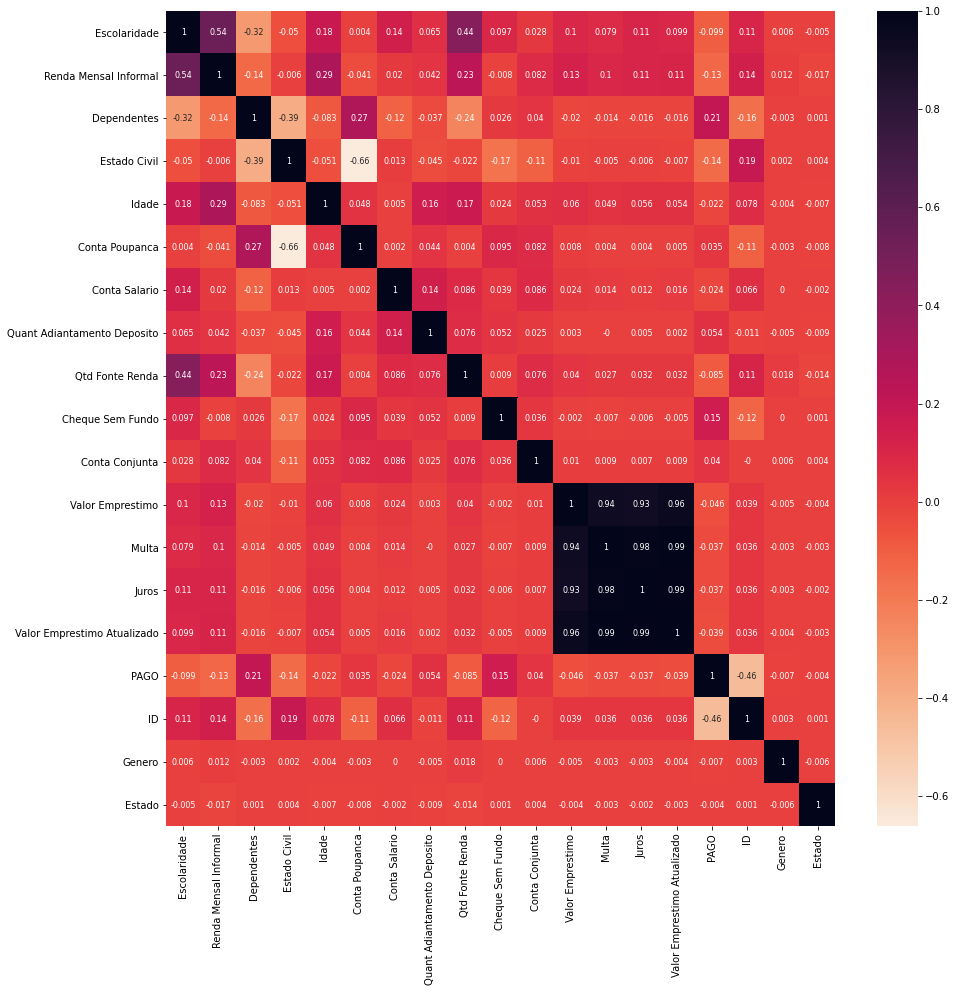

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(round(df_clean.drop(columns = ["Valor Conta Corrente","Valor Conta Poupanca","Controle"]).corr(),3),cmap = "rocket_r",annot= True,annot_kws={"fontsize":8})

In [26]:
df_clean.corr()["PAGO"].abs().sort_values(ascending=False)

PAGO                           1.000000
ID                             0.458284
Dependentes                    0.206950
Cheque Sem Fundo               0.154657
Estado Civil                   0.143398
Renda Mensal Informal          0.131826
Escolaridade                   0.098572
Qtd Fonte Renda                0.085403
Quant Adiantamento Deposito    0.054287
Valor Emprestimo               0.045821
Conta Conjunta                 0.040406
Valor Emprestimo Atualizado    0.038874
Juros                          0.037139
Multa                          0.037019
Conta Poupanca                 0.035233
Conta Salario                  0.024361
Idade                          0.021859
Genero                         0.006936
Estado                         0.003797
Valor Conta Corrente                NaN
Valor Conta Poupanca                NaN
Controle                            NaN
Name: PAGO, dtype: float64

<AxesSubplot:xlabel='Escolaridade', ylabel='Renda Mensal Informal'>

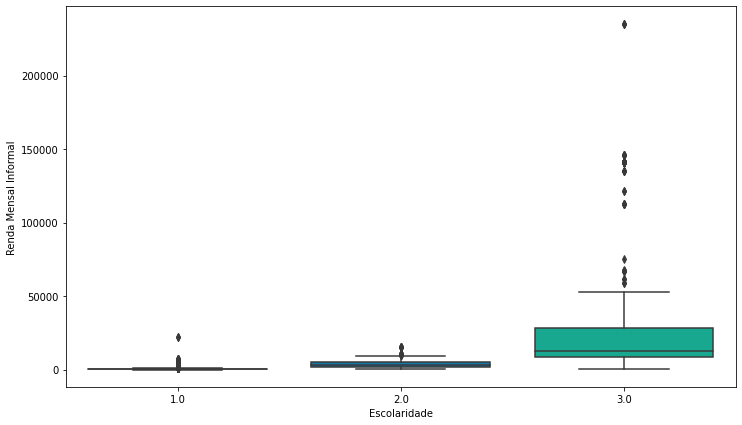

In [97]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='Renda Mensal Informal',x='Escolaridade',data=df_clean,palette='winter')

<AxesSubplot:xlabel='Renda Mensal Informal', ylabel='Count'>

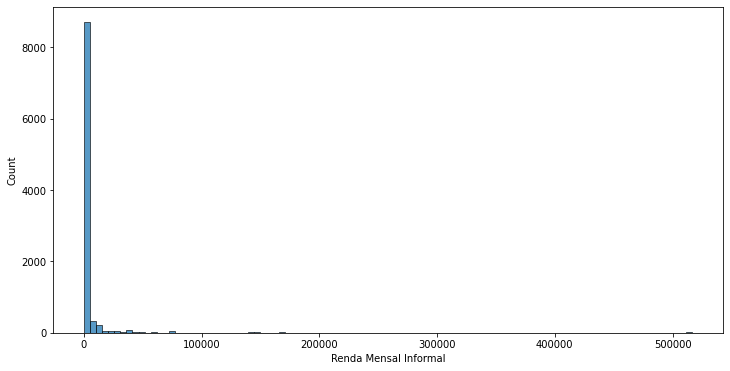

In [108]:
plt.figure(figsize = (12,6))
sns.histplot(df_clean["Renda Mensal Informal"].dropna(),bins = 100)

In [101]:
df_clean.groupby("Escolaridade")["Renda Mensal Informal"].describe()

,count,mean,std,min,25%,50%,75%,max
Escolaridade,,,,,,,,
1.0,7884.0,384.474806,771.281934,0.0096,19.8589,100.9050,418.4725,22176.0000
2.0,833.0,3617.286889,2500.949018,28.7135,1908.9126,3278.8761,5002.8855,15579.6637
3.0,821.0,24570.132874,32623.105442,260.2578,8488.7885,12895.8250,28185.0721,235367.3922


In [112]:
def impute_renda(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Renda):

        if Escol == 1:
            return 390

        elif Escol == 2:
            return 4000

        else:
            return 25000

    else:
        return Renda

def impute_escol(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Escol):

        if Renda > 1 and Renda <= 500:
            return 1

        elif Renda > 500 and Renda <= 5000:
            return 2

        elif Renda > 5000 :
            return 3

        else:
            return np.NaN

    else:
        return Renda

In [113]:
df_clean['Renda Mensal Informal'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_renda,axis=1)
df_clean['Escolaridade'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_escol,axis=1)

In [ ]:
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No handles with labels found to put in legend.


<AxesSubplot:xlabel='PAGO', ylabel='count'>

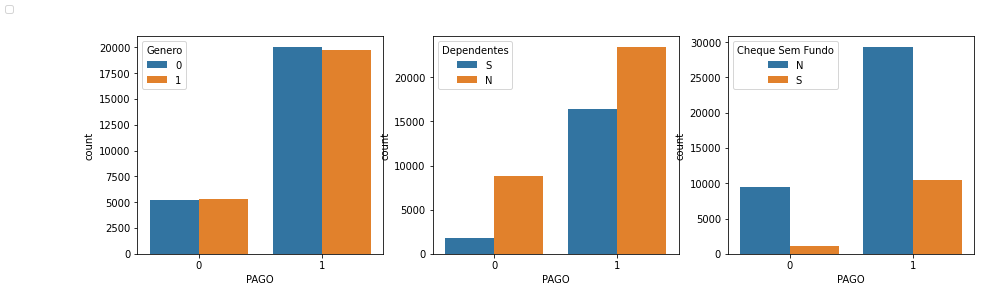

In [54]:
fig, axs = plt.subplots(ncols = 3)
fig.set_figwidth(15)
fig.legend(loc = 'upper left')
sns.countplot(df["PAGO"], hue=df["Genero"],ax = axs[0])
sns.countplot(df["PAGO"], hue=df["Dependentes"],ax = axs[1])
sns.countplot(df["PAGO"], hue=df["Cheque Sem Fundo"],ax = axs[2])


In [64]:
df_clean.columns

Index(['Escolaridade', 'Renda Mensal Informal', 'Dependentes', 'Estado Civil',
       'Idade', 'Conta Poupanca', 'Conta Salario',
       'Quant Adiantamento Deposito', 'Qtd Fonte Renda', 'Cheque Sem Fundo',
       'Conta Conjunta', 'Valor Conta Corrente', 'Valor Conta Poupanca',
       'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado',
       'PAGO', 'Controle', 'ID', 'Genero', 'Data', 'Estado'],
      dtype='object')

In [90]:
X = df_clean[['Dependentes', 'Estado Civil','Cheque Sem Fundo','Valor Emprestimo','Multa','Juros']]
y = df_clean['PAGO']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PAGO, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [93]:
rfc_pred = rfc.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[ 1829  1295]
 [  844 11149]]


In [95]:
print(classification_report(y_test,rfc_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      3124
           1       0.90      0.93      0.91     11993

    accuracy                           0.86     15117
   macro avg       0.79      0.76      0.77     15117
weighted avg       0.85      0.86      0.85     15117

